In [1]:
#pip install python-binance

In [2]:
import pandas as pd
from binance.client import Client
import datetime as dt

#client configuration
api_key = 'API HERE'
api_secret = 'SECRET API HERE'
client = Client(api_key, api_secret)

<AxesSubplot:title={'center':'JASMY'}>

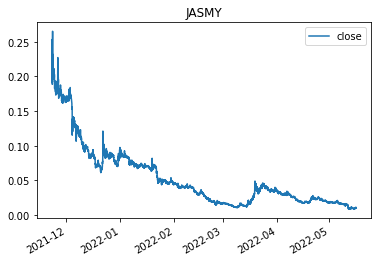

In [3]:
symbol = 'JASMYUSDT'
interval ='15m'

Client.KLINE_INTERVAL_15MINUTE

klines = client.get_historical_klines(symbol,interval,"1 Jan, 2021")

data = pd.DataFrame(klines)

#create column name

data.columns = ['open_time','open','high', 'low', 'close', 'volume',
               'close_time','gav','num_trades','taker_base_vol',
               'taker_quote_vol','ignore']

#change the time stamp
data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]

data.to_csv(symbol+'.csv', index=None, header=True)

#convert data to float and plot
df=data.astype(float)
df['close'].plot(title='JASMY', legend='close')


In [4]:
import seaborn as sns
import pandas as pd

jasmy = pd.read_csv('JASMYUSDT.csv')

jasmy.describe()

,open_time,open,high,low,close,volume,close_time,gav,num_trades,taker_base_vol,taker_quote_vol,ignore
count,1.675500e+04,16755.000000,16755.000000,16755.000000,16755.000000,1.675500e+04,1.675500e+04,1.675500e+04,16755.000000,1.675500e+04,1.675500e+04,16755.0
mean,1.645122e+12,0.053110,0.053515,0.052712,0.053101,2.495260e+07,1.645123e+12,6.810329e+05,1181.837720,1.220694e+07,3.337034e+05,0.0
std,4.353207e+09,0.044197,0.044633,0.043837,0.044192,5.392727e+07,4.353207e+09,1.569571e+06,2404.778797,2.799835e+07,8.119133e+05,0.0
min,1.637582e+12,0.008500,0.008809,0.008200,0.008500,8.929000e+02,1.637583e+12,1.000048e+01,1.000000,0.000000e+00,0.000000e+00,0.0
25%,1.641352e+12,0.019800,0.019900,0.019600,0.019800,1.411196e+06,1.641353e+12,9.217159e+04,228.000000,6.288521e+05,3.930342e+04,0.0
50%,1.645122e+12,0.038000,0.038400,0.037500,0.038000,6.359502e+06,1.645123e+12,2.215071e+05,472.000000,2.717529e+06,1.011200e+05,0.0
75%,1.648891e+12,0.073200,0.073600,0.072600,0.073100,2.509888e+07,1.648892e+12,6.064512e+05,1157.000000,1.186520e+07,2.896072e+05,0.0
max,1.652661e+12,0.265100,0.364900,0.250000,0.265000,1.378931e+09,1.652662e+12,5.031286e+07,101551.000000,7.539999e+08,2.554606e+07,0.0


In [5]:
jasmy.head()

,open_time,open,high,low,close,volume,close_time,gav,num_trades,taker_base_vol,taker_quote_vol,ignore
0,1637582400000,0.1451,0.3649,0.1451,0.2526,180187903.7,1637583299999,5.031286e+07,101551,91659276.4,2.554606e+07,0
1,1637583300000,0.2525,0.2571,0.2176,0.2298,63341104.2,1637584199999,1.482262e+07,34181,27329838.6,6.426036e+06,0
2,1637584200000,0.2297,0.2380,0.2100,0.2290,42238678.5,1637585099999,9.441252e+06,23694,20201743.5,4.532010e+06,0
3,1637585100000,0.2288,0.2530,0.2265,0.2530,31805775.9,1637585999999,7.576200e+06,21520,18208585.8,4.344537e+06,0
4,1637586000000,0.2527,0.2649,0.2358,0.2427,49055838.8,1637586899999,1.226407e+07,33395,23851263.4,5.969346e+06,0


****PYTHON REQUESTS****

In [6]:
import requests
import json
import pandas as pd
import datetime as dt

In [9]:
url = 'https://api.binance.com/api/v3/klines'
symbol = 'ADAUSDT'
interval = '1h'
start = str(int(dt.datetime(2021,5,1).timestamp()*1000))
end= str(int(dt.datetime(2021,8,1).timestamp()*1000))

par = {'symbol':symbol, 'interval':interval, 'startTime':start,
      'endTime':end}

data = pd.DataFrame(json.loads(requests.get(url, params=par).text))
 #format columns name

data.columns=['datetime', 'open','high','low','close',
             'volume','close_time','qav', 'num_trades',
             'taker_base_vol', 'taker_quote_vol','ignore']

data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]

data=data.astype(float)

In [10]:
data.head()

,datetime,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2021-05-01 00:00:00,1.619798e+12,1.3535,1.3664,1.3481,1.3534,14854765.84,1.619802e+12,2.017852e+07,28518.0,7503527.49,1.019547e+07,0.0
2021-05-01 01:00:00,1.619802e+12,1.3534,1.3643,1.3487,1.3560,11947280.91,1.619806e+12,1.622183e+07,18508.0,6301922.17,8.560118e+06,0.0
2021-05-01 02:00:00,1.619806e+12,1.3559,1.3601,1.3463,1.3551,9745907.29,1.619809e+12,1.318920e+07,16198.0,4558276.94,6.169225e+06,0.0
2021-05-01 03:00:00,1.619809e+12,1.3552,1.3599,1.3515,1.3574,7561543.58,1.619813e+12,1.025143e+07,13356.0,4124158.35,5.591526e+06,0.0
2021-05-01 04:00:00,1.619813e+12,1.3573,1.3573,1.3400,1.3456,9960335.90,1.619816e+12,1.342049e+07,17281.0,4627857.30,6.235637e+06,0.0


https://blog.devgenius.io/download-and-analyze-crypto-market-data-with-python-c23941e475f

In [1]:
pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=3a974f25d9b15e4707bc042296765abc5eb9d0c0dea9f432ab841c690e8552a0
  Stored in directory: /Users/ecuerbo/Library/Caches/pip/wheels/f2/b5/2c/59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [1]:
#load required libraries
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#list of crypto as ticker arguments
crypto=['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD']

data = yf.download(crypto, start='2020-01-01',end='2021-12-12')

data.head()

[*********************100%***********************]  4 of 4 completed


Adj Close                                         Close  \
              BNB-USD      BTC-USD     ETH-USD   XRP-USD    BNB-USD   
Date                                                                  
2019-12-31  13.727642  7193.599121  129.610855  0.192894  13.727642   
2020-01-01  13.689083  7200.174316  130.802002  0.192667  13.689083   
2020-01-02  13.027011  6985.470215  127.410179  0.188043  13.027011   
2020-01-03  13.660452  7344.884277  134.171707  0.193521  13.660452   
2020-01-04  13.891512  7410.656738  135.069366  0.194355  13.891512   

                                                    High               ...  \
                BTC-USD     ETH-USD   XRP-USD    BNB-USD      BTC-USD  ...   
Date                                                                   ...   
2019-12-31  7193.599121  129.610855  0.192894  14.095331  7335.290039  ...   
2020-01-01  7200.174316  130.802002  0.192667  13.873946  7254.330566  ...   
2020-01-02  6985.470215  127.410179  0.188043  13.715548  7212.155273  ...   
2020-01-03  7344.884277  134.171707  0.193521  13.763709  7413.715332  ...   
2020-01-04  7410.656738  135.069366  0.194355  13.921914  7427.385742  ...   

                   Low                 Open                           \
               ETH-USD   XRP-USD    BNB-USD      BTC-USD     ETH-USD   
Date                                                                   
2019-12-31  128.798157  0.189969  13.952087  7294.438965  132.612274   
2020-01-01  129.198288  0.192107  13.730962  7194.892090  129.630661   
2020-01-02  126.954910  0.186947  13.698126  7202.551270  130.820038   
2020-01-03  126.490021  0.185846  13.035329  6984.428711  127.411263   
2020-01-04  133.040558  0.191835  13.667442  7345.375488  134.168518   

                         Volume                                        
             XRP-USD    BNB-USD      BTC-USD      ETH-USD     XRP-USD  
Date                                                                   
2019-12-31  0.194518  166278254  21167946112   8936866397  1116761075  
2020-01-01  0.192912  172980718  18565664997   7935230330  1041134003  
2020-01-02  0.192708  156376427  20802083465   8032709256  1085351426  
2020-01-03  0.187948  173683857  28111481032  10476845358  1270017043  
2020-01-04  0.193521  182230374  18444271275   7430904515   999331594  

[5 rows x 24 columns]

In [3]:
#check for missing data
data.isnull().any()

Adj Close  BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Close      BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
High       BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Low        BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Open       BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
Volume     BNB-USD    False
           BTC-USD    False
           ETH-USD    False
           XRP-USD    False
dtype: bool

**Feature description**

Date: date of observation

Open: The opening price

High: Highest price

Low: Lowest price

Close: The closing price

Adj Close: The closing price after adjustments for splits and dividend

Volume: Total stocks traded

In [4]:
#explo
adj_close=data['Adj Close']
adj_close.head()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2019-12-31,13.727642,7193.599121,129.610855,0.192894
2020-01-01,13.689083,7200.174316,130.802002,0.192667
2020-01-02,13.027011,6985.470215,127.410179,0.188043
2020-01-03,13.660452,7344.884277,134.171707,0.193521
2020-01-04,13.891512,7410.656738,135.069366,0.194355


Text(0.5, 1.0, '')

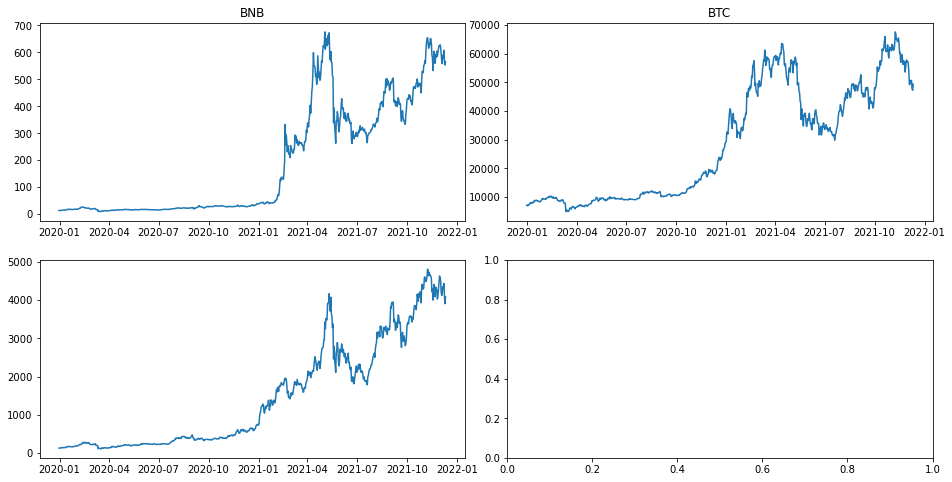

In [5]:
#plotting the addjusted cloing price.
fig, axs = plt.subplots(2,2,figsize=(16,8),
                       gridspec_kw={'hspace':0.2,
                                   'wspace':0.1})

axs[0,0].plot(adj_close['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,1].plot(adj_close['BTC-USD'])
axs[0,1].set_title('BTC')
axs[1,0].plot(adj_close['ETH-USD'])
axs[1,0].set_title('')

**Return Series**

A return is a change in the price of an asset over time. Returns can be positive, representing a profit, or negative, indicating a loss. Return series of an asset are easier to handle than price series and give a complete summary of the investment opportunity.

We will use the pandas pct_change() function to compute the returns.

These are relative price changes of the cryptocurrencies

In [6]:
#returns i.e. percentage change in the adjusted close price and drop the row with NAs
returns = adj_close.pct_change().dropna(axis=0)

returns.head()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2020-01-01,-0.002809,0.000914,0.009190,-0.001177
2020-01-02,-0.048365,-0.029819,-0.025931,-0.024000
2020-01-03,0.048625,0.051452,0.053069,0.029132
2020-01-04,0.016915,0.008955,0.006690,0.004310
2020-01-05,0.015802,0.000089,0.008939,0.006082


(-0.5, 0.5)

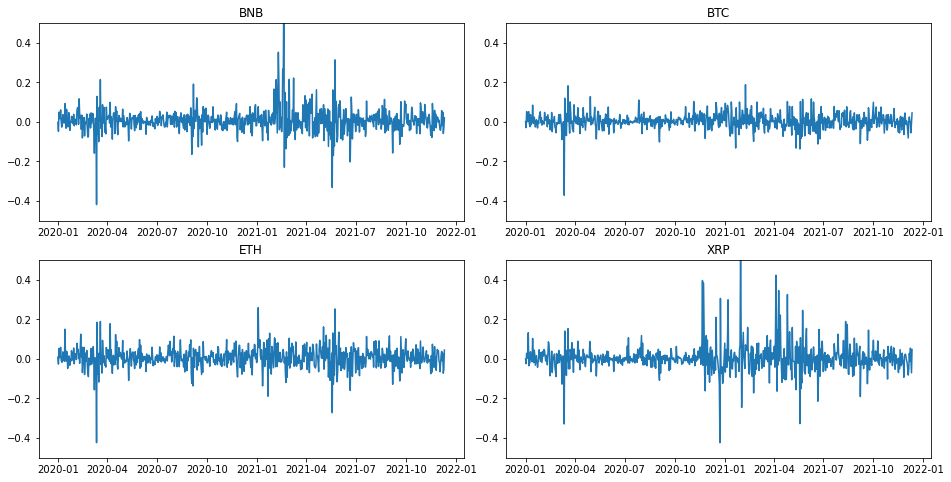

In [8]:
#plotting the returns
fig, axs  = plt.subplots(2,2, figsize=(16,8), gridspec_kw=
                       {'hspace':0.2,'wspace':0.1})
axs[0,0].plot(returns['BNB-USD'])
axs[0,0].set_title('BNB')
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns['BTC-USD'])
axs[0,1].set_title('BTC')
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['ETH-USD'])
axs[1,0].set_title('ETH')
axs[1,0].set_ylim([-0.5,0.5])
axs[1,1].plot(returns['XRP-USD'])
axs[1,1].set_title('XRP')
axs[1,1].set_ylim([-0.5,0.5])

Volatilty

Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.

In [9]:
#volatility, sd of the returns
returns.std()

BNB-USD    0.064939
BTC-USD    0.040185
ETH-USD    0.053177
XRP-USD    0.071576
dtype: float64

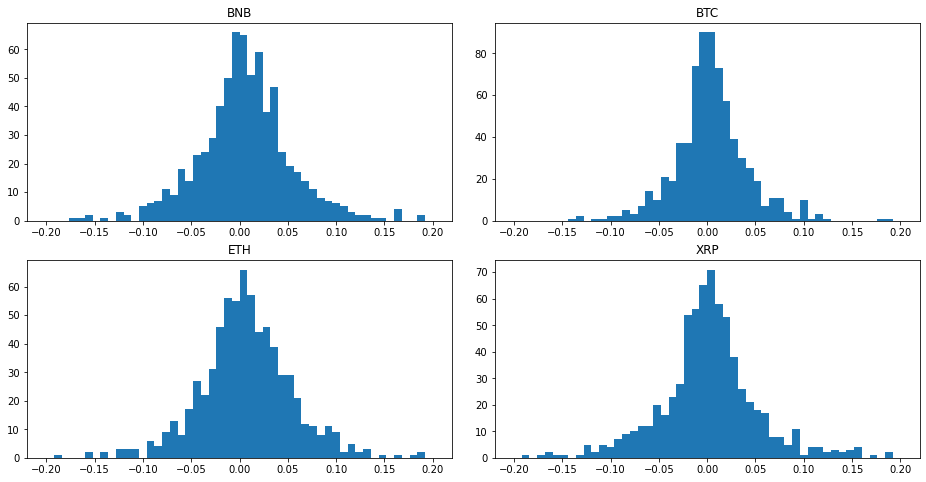

In [10]:
#Histogram
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw=
                       {'hspace':0.2,'wspace':0.1})
axs[0,0].hist(returns['BNB-USD'], bins=50, range=(-0.2,0.2))
axs[0,0].set_title('BNB')
axs[0,1].hist(returns['BTC-USD'],bins=50, range=(-0.2,0.2))
axs[0,1].set_title('BTC')
axs[1,0].hist(returns['ETH-USD'],bins=50, range=(-0.2,0.2))
axs[1,0].set_title('ETH')
axs[1,1].hist(returns['XRP-USD'],bins=50, range=(-0.2,0.2))
axs[1,1].set_title('XRP')
plt.show()

**Cumulative Returns**

Cumulative return express the total change in the price of an asset over time.

We use the pandas cumprod() function to calculate the daily cumulative simple returns.

In [11]:
#cumulative returns series
cum_returns = ((1 + returns).cumprod()-1)*100
cum_returns.head()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2020-01-01,-0.280886,0.091403,0.919018,-0.117676
2020-01-02,-5.103798,-2.893251,-1.697910,-2.514852
2020-01-03,-0.489452,2.103052,3.518881,0.325047
2020-01-04,1.193722,3.017372,4.211462,0.757410
2020-01-05,2.792738,3.026555,5.143029,1.370185


Text(0.5, 1.0, 'Cummulative returns')

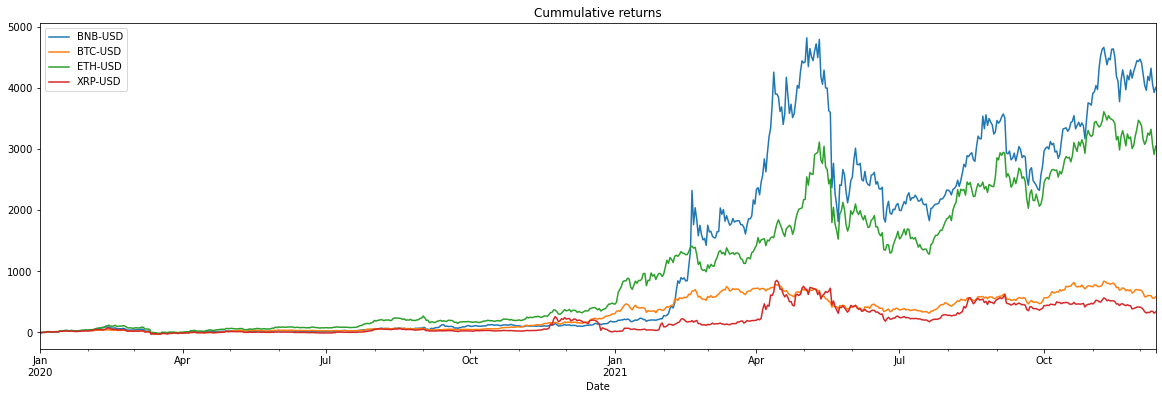

In [13]:
cum_returns.plot(figsize=(20,6))
plt.title("Cummulative returns")

**Correlation**

We’ll compute correlation on return since correlation on raw price data can give biased results. Correlation coefficients close to 1 indicate a strong positive association, -1 indicate a strong negative association and coefficients close to zero indicate no association.

In [14]:
returns.corr()

,BNB-USD,BTC-USD,ETH-USD,XRP-USD
BNB-USD,1.000000,0.641324,0.658469,0.497834
BTC-USD,0.641324,1.000000,0.793517,0.541036
ETH-USD,0.658469,0.793517,1.000000,0.581519
XRP-USD,0.497834,0.541036,0.581519,1.000000


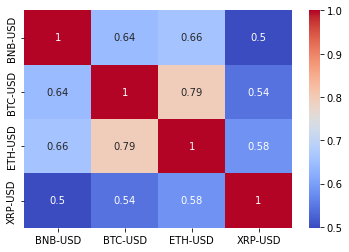

In [17]:
#plot the correlations as heatrmap
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
#Moving average
#compute a short-term 20-day moving average
ma20= adj_close.rolling(20).mean()
ma50= adj_close.rolling(50).mean()
ma100=adj_close.rolling(100).mean()

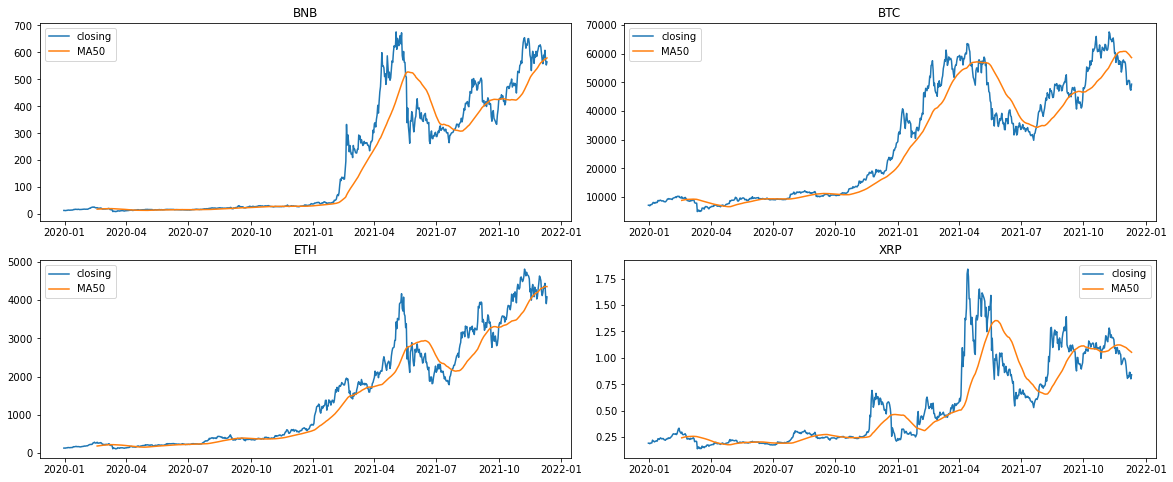

In [22]:
#plotting the moving average
fig, axs = plt.subplots(2,2, figsize=(20,8), gridspec_kw=
                       {'hspace':0.2,'wspace':0.1})
axs[0,0].plot(adj_close['BNB-USD'],label='closing')
axs[0,0].plot(ma50['BNB-USD'],label='MA50')
axs[0,0].set_title('BNB')
axs[0,0].legend()
axs[0,1].plot(adj_close['BTC-USD'],label='closing')
axs[0,1].plot(ma50['BTC-USD'],label='MA50')
axs[0,1].set_title('BTC')
axs[0,1].legend()
axs[1,0].plot(adj_close['ETH-USD'],label='closing')
axs[1,0].plot(ma50['ETH-USD'],label='MA50')
axs[1,0].set_title('ETH')
axs[1,0].legend()
axs[1,1].plot(adj_close['XRP-USD'],label='closing')
axs[1,1].plot(ma50['XRP-USD'],label='MA50')
axs[1,1].set_title('XRP')
axs[1,1].legend()

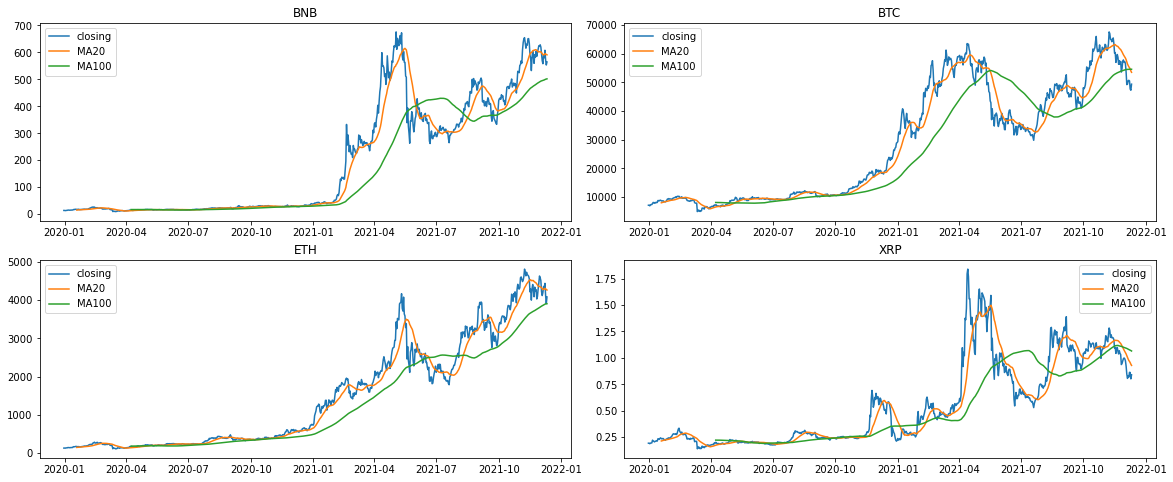

In [24]:
#PLOTTING THE MOVING AVERAGE
fig, axs = plt.subplots(2,2, figsize=(20,8), gridspec_kw=
                       {'hspace':0.2,'wspace':0.1})
axs[0,0].plot(adj_close['BNB-USD'],label='closing')
axs[0,0].plot(ma20['BNB-USD'],label='MA20')
axs[0,0].plot(ma100['BNB-USD'],label='MA100')
axs[0,0].set_title('BNB')
axs[0,0].legend()
axs[0,1].plot(adj_close['BTC-USD'],label='closing')
axs[0,1].plot(ma20['BTC-USD'],label='MA20')
axs[0,1].plot(ma100['BTC-USD'],label='MA100')
axs[0,1].set_title('BTC')
axs[0,1].legend()
axs[1,0].plot(adj_close['ETH-USD'],label='closing')
axs[1,0].plot(ma20['ETH-USD'],label='MA20')
axs[1,0].plot(ma100['ETH-USD'],label='MA100')
axs[1,0].set_title('ETH')
axs[1,0].legend()
axs[1,1].plot(adj_close['XRP-USD'],label='closing')
axs[1,1].plot(ma20['XRP-USD'],label='MA20')
axs[1,1].plot(ma100['XRP-USD'],label='MA100')
axs[1,1].set_title('XRP')
axs[1,1].legend()